#### COMPANION WORKBOOK

# Model Training

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Spending Data

In [63]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [64]:
# Import Regularized Regression algos
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [65]:
# Load ABT from Module 3
df = pd.read_csv('analytical_base_table.csv')
print(df.shape)

(1863, 42)


In [66]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [67]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [68]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [69]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )


1490 373 1490 373


## II. Preprocessing & Pipelines

In [70]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.434,2.579,2322.785,12746.660,0.879,39.496,4.389,5.005,5.186,39.561,3.362,22.909,15.770,38.509,69.471,65.013,464.266,139.610,6.510,2.779,0.093,24.344,0.266,17.940
std,1.073,0.930,1297.102,34805.545,0.327,46.986,4.498,8.442,7.443,52.335,4.694,25.724,17.999,6.615,19.865,17.093,227.250,71.511,1.975,0.517,0.290,21.209,0.442,6.452
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,3.000
25%,3.000,2.000,1351.000,1542.000,1.000,6.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,59.000,53.250,321.000,94.000,5.000,3.000,0.000,6.000,0.000,12.000
50%,4.000,3.000,1913.500,6183.000,1.000,21.000,3.000,2.000,3.000,20.000,2.000,15.000,10.000,38.000,74.000,66.000,426.000,125.000,7.000,3.000,0.000,20.000,0.000,18.000
75%,4.000,3.000,3014.750,11761.000,1.000,56.000,7.000,6.000,6.000,50.000,5.000,35.000,21.000,43.000,84.000,78.000,572.000,169.000,8.000,3.000,0.000,38.000,1.000,24.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,114.000,1.000,30.000


In [71]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Block,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,"exterior_walls_Rock, Stone",exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.269,-1.697,-1.405,-0.366,-2.688,-0.841,-0.976,-0.593,-0.697,-0.756,-0.716,-0.891,-0.876,-2.496,-2.943,-3.511,-1.656,-1.533,-2.790,-3.440,-0.319,-1.148,-0.601,-2.316,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
25%,-0.405,-0.622,-0.749,-0.322,0.372,-0.713,-0.753,-0.593,-0.697,-0.641,-0.716,-0.735,-0.654,-0.833,-0.527,-0.688,-0.630,-0.638,-0.765,0.427,-0.319,-0.865,-0.601,-0.921,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
50%,0.527,0.452,-0.316,-0.189,0.372,-0.394,-0.309,-0.356,-0.294,-0.374,-0.290,-0.307,-0.321,-0.077,0.228,0.058,-0.168,-0.204,0.248,0.427,-0.319,-0.205,-0.601,0.009,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,-0.850,0.850
75%,0.527,0.452,0.533,-0.028,0.372,0.351,0.581,0.118,0.109,0.199,0.349,0.470,0.291,0.679,0.731,0.760,0.474,0.411,0.754,0.427,-0.319,0.644,1.662,0.939,-0.069,1.334,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,1.650,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,1.176,0.850
max,1.459,3.676,4.255,12.174,0.372,4.821,4.360,5.685,5.618,5.741,6.741,5.990,4.346,4.609,1.537,2.047,17.794,17.262,1.767,2.360,3.129,4.227,1.662,1.869,14.550,1.334,6.353,3.990,3.768,2.714,5.731,17.228,1.650,3.768,3.558,0.744,2.069,3.943,5.365,1.176,0.850


In [72]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Block,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,"exterior_walls_Rock, Stone",exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.269,-1.697,-1.405,-0.366,-2.688,-0.841,-0.976,-0.593,-0.697,-0.756,-0.716,-0.891,-0.876,-2.496,-2.943,-3.511,-1.656,-1.533,-2.790,-3.440,-0.319,-1.148,-0.601,-2.316,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
25%,-0.405,-0.622,-0.749,-0.322,0.372,-0.713,-0.753,-0.593,-0.697,-0.641,-0.716,-0.735,-0.654,-0.833,-0.527,-0.688,-0.630,-0.638,-0.765,0.427,-0.319,-0.865,-0.601,-0.921,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
50%,0.527,0.452,-0.316,-0.189,0.372,-0.394,-0.309,-0.356,-0.294,-0.374,-0.290,-0.307,-0.321,-0.077,0.228,0.058,-0.168,-0.204,0.248,0.427,-0.319,-0.205,-0.601,0.009,-0.069,-0.749,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,-0.606,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,-0.850,0.850
75%,0.527,0.452,0.533,-0.028,0.372,0.351,0.581,0.118,0.109,0.199,0.349,0.470,0.291,0.679,0.731,0.760,0.474,0.411,0.754,0.427,-0.319,0.644,1.662,0.939,-0.069,1.334,-0.157,-0.250,-0.265,-0.368,-0.174,-0.058,1.650,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,1.176,0.850
max,1.459,3.676,4.255,12.174,0.372,4.821,4.360,5.685,5.618,5.741,6.741,5.990,4.346,4.609,1.537,2.047,17.794,17.262,1.767,2.360,3.129,4.227,1.662,1.869,14.550,1.334,6.353,3.990,3.768,2.714,5.731,17.228,1.650,3.768,3.558,0.744,2.069,3.943,5.365,1.176,0.850


In [73]:
X_test_new = (X_test - X_train.mean()) / X_train.std()


In [74]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [75]:
# For standardization
from sklearn.preprocessing import StandardScaler
# Pipeline with Standardization and Lasso Regression
make_pipeline(StandardScaler(), Lasso(random_state=123))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=123))])

In [76]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123))
}
# Add a pipeline for Elastic-Net
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

## III. Tuning Hyperparameters

In [77]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [78]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
#Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [79]:
# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [80]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)
type(model)

sklearn.model_selection._search.GridSearchCV

In [81]:
# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [82]:
# Fit and tune model
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.127e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.639e+12, tolerance: 3.184e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+12, tolerance: 3.178e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+12, tolerance: 3.117e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+11, toler

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

In [83]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.127e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+12, tolerance: 3.195e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.639e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e+11, tolerance: 3.195e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.099e+11, tolerance: 3.192e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.698e+10, tolerance: 3.178e+09
  model = cd_fast.enet_coordinate_descent(


lasso has been fitted.
ridge has been fitted.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.554e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.527e+12, tolerance: 3.178e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.694e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.526e+12, tolerance: 3.117e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.460e+12, tolerance: 3.192e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.229e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.867e+12, tolerance: 3.199e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.785e+12, tolerance: 3.117e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.482e+12, tolerance: 3.117e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+10, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.536e+10, toler

enet has been fitted.


## IV. Model Selection

In [84]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.30599690462648504
ridge 0.31412755024667083
enet 0.34147249144458647


In [85]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [86]:
# Display fitted random forest object
fitted_models['lasso']
# Predict test set using fitted random forest
pred = fitted_models['lasso'].predict(X_test)

In [87]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.4076953447083528
MAE: 85157.84633888621


#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 5.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, confirm that you've successfully separated the data into a training set and a test set.
* How many observations are in the training set?
* How many observations are in the test set?

In [88]:
print(X_train.shape[0])
print(X_test.shape[0])

1490
373


#### B.) Next, display the Ridge regression pipeline object saved in the pipelines dictionary.
* What steps are in the pipeline?

In [89]:
print( pipelines['ridge'] )


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=123))])


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))]
</pre>

#### C.) Finally, display the <code>l1_ratio</code> hyperparameter values to try for your Elastic-Net algorithm.
* **Tip:** Remember the naming convention within pipelines (need the named step first).

In [90]:
print(enet_hyperparameters['elasticnet__l1_ratio'])

[0.1, 0.3, 0.5, 0.7, 0.9]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[0.1, 0.3, 0.5, 0.7, 0.9]
</pre>

## <span style="color:RoyalBlue">Exercise 5.2 - Sklearn's Standard Scaler</span>

Whenever you preprocess your dataset, it's important to use the same **preprocessing parameters** on new data as you used on the training set. So if you standardize your dataset, you must also standardize the test set with the same means and standard deviations from the training set.

#### A.) First, display the standardization parameters for the <code>beds</code> feature in the training set (<code>X_train</code>).
* You'll need the mean and standard deviation.

In [91]:
print("Mean: ", X_train.beds.mean())
print("Standard Deviation: ", X_train.beds.std())

Mean:  3.434228187919463
Standard Deviation:  1.0729140858452646


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Mean: 3.434228187919463
Standard Deviation: 1.0729140858452646
</pre>

#### B.) Next, based on your parameters from part (A), manually standardize the first 5 observations from the <code>beds</code> feature in the TRAINING set. Display the results.

In [92]:
(X_train['beds'].head() - X_train.beds.mean()) / X_train.beds.std()


1689    1.459
1531    0.527
668    -0.405
1740    1.459
117    -1.337
Name: beds, dtype: float64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
1689    1.459
1531    0.527
668    -0.405
1740    1.459
117    -1.337
Name: beds, dtype: float64
</pre>

#### C.) Next, based on your parameters from part (A), manually standardize the first 5 observations from the <code>beds</code> feature in the TEST set. Display the results.

In [93]:
(X_test['beds'].head() - X_train.beds.mean()) / X_train.beds.std()


266   -1.337
790   -0.405
222   -1.337
220   -1.337
920   -0.405
Name: beds, dtype: float64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
266   -1.337
790   -0.405
222   -1.337
220   -1.337
920   -0.405
Name: beds, dtype: float64
</pre>

#### D.) Scikit-Learn's <code>StandardScaler()</code> class allows you to save those preprocessing parameters learned from the training set.
1. First, initialize and instance of the scaler class.

<pre style="color:steelblue">
scaler = StandardScaler()
</pre>

2. Then, call the <code>.fit()</code> while passing in the **entire** training set (all of the features, not just beds).

In [94]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

#### E.) Now you can display the preprocessing parameters directly from the <code>scaler</code> object.
* It will save the means from all features as an array in <code>.mean_</code>.
* It will save the standard deviations from all features as an array in <code>.scale_</code>.
* **Tip:** The <code>beds</code> feature should be the first one.
* Check for yourself that the preprocessing parameters are the same as the ones you found in part (A).

In [95]:
print(scaler.mean_[0])
print(scaler.scale_[0])


3.434228187919463
1.0725539871320342


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Mean: 3.434228187919463
Standard Deviation: 1.0725539871320342
</pre>

#### F.) Next, use the <code>scaler</code> object to <code>.transform()</code> your test set and save it as <code>X_test_new</code>.

In [96]:
X_test_new = scaler.transform(X_test)

Note that when you use <code>scaler</code> to transform a dataset, it returns a NumPy array and NOT a Pandas DataFrame.

#### G.) Confirm this for yourself. Display the class and shape of <code>X_test_new</code>.

In [97]:
print(type(X_test_new))
print(X_test_new.shape)

<class 'numpy.ndarray'>
(373, 41)


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
&lt;class 'numpy.ndarray'&gt;
(373, 39)
</pre>

#### H.) Finally, display the first 5 transformed values for the <code>beds</code> feature.
* Because <code>X_test_new</code> is a NumPy array, you won't be able to just call <code>.beds</code> like with Pandas DataFrames. If you try that, you'll get the error:

<pre>
<span style="color:crimson">AttributeError:</span> 'numpy.ndarray' object has no attribute 'beds'
</pre>

* Instead, you'll need to index the NumPy array to get the **first 5 rows** from the **first column**. (This is just meant as a refresher and a bit of practice.)
* Confirm that the values are the same as the ones you found in part (C) manually. Note that the rounding/precision may be slightly different.

In [98]:
print(X_test_new[0:5,0])

[-1.33720839 -0.40485439 -1.33720839 -1.33720839 -0.40485439]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[-1.33720839 -0.40485439 -1.33720839 -1.33720839 -0.40485439]
</pre>

## <span style="color:RoyalBlue">Exercise 5.3 - Tree Pipelines</span>

In the Coding Section, we created a pipeline dictionary with model pipelines for Lasso, Ridge, and Elastic-Net regressions. In this exercise, let's add pipelines for tree ensembles.

#### A.) Add pipelines for <code style="color:SteelBlue">RandomForestRegressor</code> and <code style="color:SteelBlue">GradientBoostingRegressor</code> to your pipeline dictionary.
* Name them <code style="color:crimson">'rf'</code> for random forest and <code style="color:crimson">'gb'</code> for gradient boosted tree.
* Both pipelines should standardize the data first.
* For both, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [99]:
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))


#### B.) Just as a quick sanity check, display the pipeline object for your random forest.

In [100]:
print(pipelines['rf'])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=123))])


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])
</pre>

#### C.) As another quick sanity check, display the class for the pipeline object for your random forest.

In [101]:
print(type(pipelines['rf']))


<class 'sklearn.pipeline.Pipeline'>


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
&lt;class 'sklearn.pipeline.Pipeline'&gt;
</pre>

#### D.) Finally, let's check that all of the model pipelines are of the correct type. For each item in your <code>pipelines</code> dictionary, display its key and the class of its value.

In [102]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
lasso &lt;class 'sklearn.pipeline.Pipeline'&gt;
ridge &lt;class 'sklearn.pipeline.Pipeline'&gt;
enet &lt;class 'sklearn.pipeline.Pipeline'&gt;
rf &lt;class 'sklearn.pipeline.Pipeline'&gt;
gb &lt;class 'sklearn.pipeline.Pipeline'&gt;
</pre>

## <span style="color:RoyalBlue">Exercise 5.4 - Hyperparameter Grids</span>

In the Coding Section, we declared hyperparameter grids for our regularized regression algorithms: Lasso, Ridge, and Elastic-Net. Next, let's do the same for our tree ensembles.


#### Let's start by declaring the hyperparameter grid for our random forest.

The first one we'll tune is <code style="color:steelblue; font-weight:bold">n_estimators</code>.
* This is the number of decision trees to include in the random forest.
* Usually, more is better.
* The default value is 10, which is usually too few.
* Let's try 100 and 200.

The second one we'll tune is <code style="color:steelblue; font-weight:bold">max_features</code>.
* This controls the number of features each tree is allowed to choose from.
* It's what allows your random forest to perform feature selection.
* The default value is <code style="color:crimson">'auto'</code>, which sets <code style="color:steelblue">max_features = n_features</code>.
* Let's also try <code style="color:crimson">'sqrt'</code>, which sets <code style="color:steelblue">max_features = sqrt(n_features)</code>
* And <code style="color:crimson">0.33</code>, which sets <code style="color:steelblue">max_features = 0.33 * n_features</code>

#### A.) Declare a hyperparameter grid for <code style="color:SteelBlue">RandomForestRegressor</code>.
* Name it <code style="color:steelblue">rf_hyperparameters</code>

* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__max_features'</span>: ['auto', 'sqrt', 0.33]</code>

In [103]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

Next, let's declare settings to try for our boosted tree.

#### B.) Declare a hyperparameter grid for <code style="color:SteelBlue">GradientBoostingRegressor</code>.
* Name it <code style="color:steelblue">gb_hyperparameters</code>.
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__learning_rate'</span>: [0.05, 0.1, 0.2]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__max_depth'</span>: [1, 3, 5]</code>

In [104]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}


Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

#### C.) Create a <code style="color:steelblue">hyperparameters</code> dictionary.
* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
    * If you forgot what those keys were, you can insert a new code cell and call <code style="color:steelblue">pipelines.keys()</code> for a reminder.
* Set the values to the corresponding **hyperparameter grids** we've been declaring throughout this module.
    * e.g. <code style="color:steelblue"><span style="color:crimson">'rf'</span> : rf_hyperparameters</code>
    * e.g. <code style="color:steelblue"><span style="color:crimson">'lasso'</span> : lasso_hyperparameters</code>

In [105]:
hyperparameters = {'lasso' : lasso_hyperparameters,
                   'ridge': ridge_hyperparameters,
                   'enet': enet_hyperparameters,
                   'rf' : rf_hyperparameters,
                   'gb':gb_hyperparameters
                  }

#### D.) Finally, run this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.

In [106]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
</pre>

## <span style="color:RoyalBlue">Exercise 5.5 - Model Dictionaries</span>

Similar to how we created dictionaries for our pipelines and hyperparameter grids, we can do the same for our fitted models. Obviously, there are other valid ways to organize your code and models, but this is a simple and practical way that does the job. By the end of the script, you'll have various dictionary objects that can each be accessed by the same consistent keys.

#### A.) Create a dictionary of models named <code style="color:SteelBlue">fitted_models</code> to store models that have been tuned using cross-validation.
* The keys should be the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values should be <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* After fitting each model, print <code style="color:crimson">'{name} has been fitted.'</code> just to track the progress.
* **Tip:** We've started you off with some code.

This step can take a few minutes, so please be patient.

In [107]:
fitted_model = {}

for key, value in pipelines.items():
    fitted_model[key]= GridSearchCV(value, hyperparameters[key], cv=10, n_jobs=-1)
    fitted_model[key].fit(X_train, y_train)
    print(key, " has been fitted.")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+12, tolerance: 3.195e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.127e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.639e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+12, tolerance: 3.141e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.866e+11, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.865e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.698e+10, tolerance: 3.178e+09
  model = cd_fast.enet_coordinate_descent(


lasso  has been fitted.
ridge  has been fitted.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.670e+12, tolerance: 3.199e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.554e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.249e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+12, tolerance: 3.171e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.353e+12, tolerance: 3.151e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.432e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.278e+12, tolerance: 3.151e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.420e+12, tolerance: 3.141e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.474e+12, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.399e+12, tolerance: 3.117e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.385e+12, tolerance: 3.178e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for Ra

enet  has been fitted.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

rf  has been fitted.
gb  has been fitted.


#### B.) Check that the models are of the correct type. For each item in your <code>fitted_models</code> dictionary, display its key and the class of its value.

In [108]:
for key, value in fitted_models.items():
    print(key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
lasso &lt;class 'sklearn.model_selection._search.GridSearchCV'&gt;
ridge &lt;class 'sklearn.model_selection._search.GridSearchCV'&gt;
enet &lt;class 'sklearn.model_selection._search.GridSearchCV'&gt;
rf &lt;class 'sklearn.model_selection._search.GridSearchCV'&gt;
gb &lt;class 'sklearn.model_selection._search.GridSearchCV'&gt;
</pre>

#### C.) Finally, run this code to check that the models have been fitted correctly.

In [109]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
</pre>

## <span style="color:RoyalBlue">Exercise 5.6 - Model Selection</span>

In the Coding Section, we displayed performance metrics for a sample Lasso regression model. Now, let's do the same thing for all of our models, including our tree ensembles and then pick the final winner.

#### A.) First, display the cross-validated training performance for each model in <code style="color:SteelBlue">fitted_models</code> .

In [110]:
for key, model in fitted_models.items():
    print(key, model.best_score_)

lasso 0.30599690462648504
ridge 0.31412755024667083
enet 0.34147249144458647


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
lasso 0.30862751105084013
ridge 0.3166111585985649
enet 0.34285741369864786
rf 0.4801823564169308
gb 0.48778099198016756
</pre>

#### B.) Next, use a <code style="color:SteelBlue">for</code> loop, print the performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.
* Print both <code style="color:SteelBlue">r2_score</code> and <code style="color:SteelBlue">mean_absolute_error</code>.
* Those functions each take two arguments:
    * The actual values for your target variable (<code style="color:SteelBlue">y_test</code>)
    * Predicted values for your target variable
* Label the output with the name of the algorithm. For example:

<pre style="color:crimson">
lasso
--------
R^2: 0.409313458932
MAE: 84963.5598922
</pre>

In [111]:
for key, model in fitted_models.items():
    pred = model.predict(X_test)
    print(key)
    print("--------")
    print("R^2:", r2_score(y_test, pred))
    print("MAE:", mean_absolute_error(y_test, pred))

lasso
--------
R^2: 0.4076953447083528
MAE: 85157.84633888621
ridge
--------
R^2: 0.40820399307641064
MAE: 85094.46663886428
enet
--------
R^2: 0.40341879221480215
MAE: 86584.904378318


<strong style="color:RoyalBlue">Expected output:</strong>

<pre>
lasso
--------
R^2: 0.4088862476281637
MAE: 85035.54256465772

ridge
--------
R^2: 0.4093396476329718
MAE: 84978.03564808934

enet
--------
R^2: 0.4038573361696519
MAE: 86529.0068234889

rf
--------
R^2: 0.5712128842598444
MAE: 67885.87587131368

gb
--------
R^2: 0.5270040007880257
MAE: 71245.11216404787
</pre>

#### C.) Next, ask yourself these questions to pick the winning model:
* Which model had the highest $R^2$ on the test set?
* Which model had the lowest mean absolute error?
* Are these two models the same one?
* Did it also have the best holdout $R^2$ score from cross-validation?
* Does it satisfy our project's win condition? (**Tip:** In the event of ambiguous results based on the previous questions, THIS should be your final deciding factor on whether a model is "good enough.")

#### D.) Finally, plot the performance of the winning model on the test set.
* Plot a scatterplot with predicted transaction price on the x-axis and actual transaction price on the y-axis.
* This last visual check is a nice way to confirm our model's performance.
* Are the points scattered around the 45 degree diagonal (what does the 45 degree diagonal line represent)?

In [112]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

KeyError: 'rf'

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="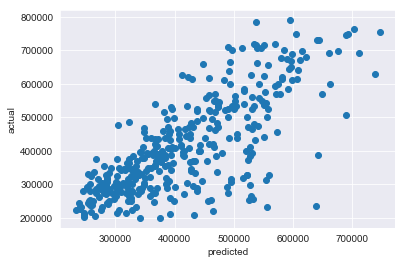&#10;">

## <span style="color:RoyalBlue">Exercise 5.7 - Saving Your Model</span>

Great job, you've created a pretty kick-ass model for real-estate valuation. Now it's time to save your hard work.

#### A.) First, display the class of your winning "model" in the <code>fitted_models</code> dictionary object.
* Remember, you can access it with its corresponding key.

In [ ]:
print(type(fitted_models['rf']))


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
sklearn.model_selection._search.GridSearchCV
</pre>

It looks like this is still the <code style="color:steelblue">GridSearchCV</code> class. 
* You can actually directly save this object if you want, because it will use the winning model pipeline by default. 
* However, what we really care about is the actual winning model <code style="color:steelblue">Pipeline</code>, right?

#### B.) Confirm you can access the winning model pipeline. Display the class of the model pipeline.
* **Tip:** You can use its <code style="color:steelblue">best\_estimator_</code> method to access it.

In [ ]:
type(fitted_models['rf'].best_estimator_)


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
sklearn.pipeline.Pipeline
</pre>

#### C.) Display the winning pipeline object directly. What are the values of the winning values for our hyperparameters?

In [ ]:
fitted_models['rf'].best_estimator_


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])
</pre>

The winning values for our hyperparameters are:
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

#### D.) Finally, let's save the winning <code style="color:steelblue">Pipeline</code> object object. To do so, we'll import a helpful package called <code style="color:steelblue">pickle</code>, which saves Python objects to disk.
* First, <code>import pickle</code>.
* Then, use the following syntax to "dump" your model into a pickle file.

<pre style="color:steelblue">
with open('final_model.pkl', 'wb') as f:
    pickle.dump(<strong>insert answer to previous question here</strong>, f)
</pre>
* **Note:** We'll show you in the next project how to take this a step further and use the pickled model for various use cases. For now, we don't want to spread ourselves too thin over too many topics, so let's just save that final model and move on.

In [ ]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

Congratulations... you've built and saved a successful model trained using machine learning!

As a reminder, here are a few things you did in this module:
* You split your dataset into separate training and test sets.
* You set up preprocessing pipelines.
* You tuned your models using cross-validation.
* And you evaluated your models, selecting and saving the winner.